# 6. Classification

Classification is the task of assigning a category or label to an observation. A classifier is an algorithm that implements classification. There are two main types of classification: binary and multiclass.

In general it is a poor idea to use linear regression algorithms for classification tasks. A reression learns a continuous output variable. In other words regression is good at estimating the value of something e.g. price, weight, height etc. If we were to use regression for a binary classification we might end up with prediction values of $0.1, 0.2, \dots, 0.7$ etc, which does not suit the goal of predicting either a $0$ or a $1$.

Classification on the other hand only produces discrete outputs. There are many ways to do this. Here we will focus on Logistic Regression.

## 6.1 Use Cases

**Medical**: Develop a model to determine the likelihood of a patient's successful response to a particular treatment. Features might include treatment type, blood type, age, weight...

**Finance**: Using a loan applicant's history and attributes to predict whether an applicant will default on the loan.

**Engineering**: Using operating conditions and sensor measurements, determine the probability of a mechanical or electrical failure.

## 6.2 Logistic Regression

One way to approach Classification is to use probability:

   *If we can calculate the probabilty of an observation belonging to each class we can assign it to the class with the highest probability.*

Therefore we need a function or model that takes an observation/feature vector as input and returns a probability. We will focus on the binary classification case. Therefore we can simplify our search to finding the probability, $p$, for the "success" case. The probability of the other class can be calculated using the complentary nature of probability ($1- p$).

To summarise, we need a function that:
- Returns a value in the the interval $[0, 1]$ (for a valid probability)
- Extreme input values return $0$ or $1$
- Accepts scalar and vector inputs


### 6.2.1 Logistic Function

It turns out that the Logistic Function is a function that meets all the requirements.

$$y = \frac {1}{1+e^{-t}}$$

The function looks like this:

<img src="img/logit.png" width=300>

We can control the location of the x intercept $x_0$ and the steepness of the curve via $k$

$$y = \frac {1}{1+e^{-k(x - x_0)}}$$

Notice that the parameterisation with $x_0$ and $k$ looks a little similiar to a linear model $\beta_0 + \beta_1 x$. In fact if we set $t = \beta_0 + \beta_1 x$ we can find parameters that best fit our data.

**Simple Logistic Regression model**
$$y = \frac {1}{1+e^{-(\beta_0 + \beta_1 x)}}$$

Notice that the logistic function is non-linear and more flexible than a linear regression, which can improve classification accuracy and is often more robust to outliers. 

## 6.3 Relationship to Linear Regression

$$ log \left( \frac{y}{1 - y} \right )  = \beta_0 + \beta_1 x $$

where $y$ is the logistic function

$$y = \frac {1}{1+e^{-(\beta_0 + \beta_1 x)}}$$

Sometimes $y$ is written as $p(x)$ since it is the probability of the success case given $x$. For a multivariate model this becomes:

$$ log \left( \frac{y}{1 - y} \right )  = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... \beta_n x_n $$

## 6.4 Customer Churn Example

The "default.csv" dataset contains information on ten thousand customers of a bank. The bank has provided loans to these customers and recorded the following statistics about the loan and the customers:
- default, whether the loan was repaid or not
- student, whether the customer was a student for the period of the loan
- balance, the balance in the customers bank account
- income, the customers income at the time of loan commencement

The bank wants to build a model to predict if a new customer will be able to pay back their loan and which variables can be used as indicators of loan safety.

In [1]:
df <- read.csv('default.csv')

head(df)

default,student,balance,income
<int>,<fct>,<dbl>,<dbl>
0,No,729.5265,44361.625
0,Yes,817.1804,12106.135
0,No,1073.5492,31767.139
0,No,529.2506,35704.494
0,No,785.6559,38463.496
0,Yes,919.5885,7491.559


In this case, the target variable is `default`, while all other variables serve as features in our model. Let's count the occurrences of each outcome for the `default` column. We can do this by converting to factor levels and using the `summary()` function, or by using `sum()` to count the occurences of the `1`or `default` class.

In [2]:
df$default <- as.factor(df$default)

summary(df)

 default  student       balance           income     
 0:9667   No :7056   Min.   :   0.0   Min.   :  772  
 1: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                     Median : 823.6   Median :34553  
                     Mean   : 835.4   Mean   :33517  
                     3rd Qu.:1166.3   3rd Qu.:43808  
                     Max.   :2654.3   Max.   :73554  

There are 9667 "no default" (repaid) and 333 "default" (did not repay) examples.

This might skew our classifier in favour of the no default class. Why? Because most people pay back their loans. This might cause our classifier to classify everyone as "no default". Therefore we should try to maximise the number of true positives.

If we use a random train-test-split of the dataset it is likely we'll end up with a different balance between these two classes wich may effect our modeling and predictability, so we'd like to keep the proportion of yes/no the same as in the full labeled dataset, but take a random subset of the data to train our model on. There is a way to do this using "caret" package function `createDataPartition()`.

In [3]:
library(caret)
# Let's split the data into train and test datasets
dpart <- createDataPartition(df$default, p = 0.75, list = FALSE)
train <- df[dpart, ]
test <- df[-dpart, ]

Loading required package: lattice
Loading required package: ggplot2


We can fit a logistic model to the data using the `glm()` function (which stands for general linear model) and using the argument `family=binomial(link='logit')`.

In [4]:
logit <- glm(default ~ ., data=train, family=binomial(link='logit'))

summary(logit)


Call:
glm(formula = default ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3620  -0.1526  -0.0621  -0.0242   3.6826  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.049e+01  5.511e-01 -19.033   <2e-16 ***
studentYes  -5.868e-01  2.704e-01  -2.170    0.030 *  
balance      5.460e-03  2.532e-04  21.566   <2e-16 ***
income       3.208e-06  9.492e-06   0.338    0.735    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2192.2  on 7500  degrees of freedom
Residual deviance: 1220.1  on 7497  degrees of freedom
AIC: 1228.1

Number of Fisher Scoring iterations: 8


The coefficient estimates correspond to the model parameters $\beta$ in the equations above. As in the linear regression case, there are tests to determine if the coefficients are significantly different from zero. Such significant coefficients correspond to small values of Pr(>|z|), which denote the p-value for the hypothesis test to determine if the estimated model parameter is significantly different from zero. Since the p-value for income is large, we can discard the variable.

In [5]:
logit <- glm(default ~ student + balance, data=train, family=binomial(link='logit'))

summary(logit)


Call:
glm(formula = default ~ student + balance, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3496  -0.1526  -0.0620  -0.0241   3.6882  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.036e+01  4.029e-01 -25.719  < 2e-16 ***
studentYes  -6.585e-01  1.670e-01  -3.944 8.01e-05 ***
balance      5.461e-03  2.531e-04  21.577  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2192.2  on 7500  degrees of freedom
Residual deviance: 1220.2  on 7498  degrees of freedom
AIC: 1226.2

Number of Fisher Scoring iterations: 8


## 6.4 Evaluating Classification Performance

Logistic regression is often used as a classifier to assign class labels to a person, item, or transaction based on the predicted probability provided by the model. In the `default` example, a customer can be classified with the label called `default` if the logistic model predicts a high probability that the customer will `default`. Otherwise, a `0` label is assigned to the customer. Commonly, 0.5 is used as the default probability threshold to distinguish between any two class labels. However, any threshold value can be used depending on the preference to avoid false positives (for example, to predict `default` when actually the customer will repay the loan) or false negatives (for example, to predict repayment when the customer will actually default).

In general, for two class labels, C and ¬C, where “¬C” denotes “not C,” some working definitions and formulas follow:

    ● True Positive: predict C, when actually C
    ● True Negative: predict ¬C,when actually ¬C
    ● False Positive: predict C, when actually ¬C
    ● False Negative: predict ¬C, when actually C

### 6.4.1 Confusion Matrix

There are many metrics that you can use to evaluate the classification accuracy.

These metrics work by comparing our model's predicted values to known labels, so you always need the ground-truth classification for your data when evaluating classification performance.

The simplest approach is to use a confusion matrix and the classification report, which shows multiple metrics at once!

The confusion matrix keeps track of our model's hits and misses, and shows the number of true positive, false positive, false negative and true negative classifications. Ideally we want a diagonal matrix, meaning only true positive and true negative classifications.

<img src="img/confusion_m.png" width=300>

The confusion matrix can be used to compute other metrics. For instance, the ``Precision`` of a model (or positive predictive value) is simply the proportion of all points identified as positives that were correctly classified. We can write this as:

$$Precision = \frac{TP}{TP+FP}$$

``Recall`` (or true positive rate) is the proportion of actual positives that were correctly classified by our model. We can express this as:

$$Recall = \frac{TP}{TP + FN}$$

The ``F1`` score is the _harmonic mean_ of precision and recall, and reaches its best value at 1 (perfect precision and recall), corresponding to a perfectly diagonal confusion matrix, and worst at 0. The F1 score can be expressed as:

$$F_1 = \left(\frac{Recall^{-1}+Precision^{-1}}{2}\right)^{-1}$$

To calculate these values in R we can generate predictions using the test set, and then use the `confusionMatrix()` function.

In [6]:
# Generate probabilities
probabilities <- predict(logit, test, type='response')
# Convert to factor of class assignments
predicted <- as.factor(ifelse(probabilities > 0.5, 1, 0))
# Produce the confusion matrix and other metrics
confusionMatrix(predicted, test$default)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2412   60
         1    4   23
                                          
               Accuracy : 0.9744          
                 95% CI : (0.9674, 0.9802)
    No Information Rate : 0.9668          
    P-Value [Acc > NIR] : 0.01662         
                                          
                  Kappa : 0.4085          
                                          
 Mcnemar's Test P-Value : 6.199e-12       
                                          
            Sensitivity : 0.9983          
            Specificity : 0.2771          
         Pos Pred Value : 0.9757          
         Neg Pred Value : 0.8519          
             Prevalence : 0.9668          
         Detection Rate : 0.9652          
   Detection Prevalence : 0.9892          
      Balanced Accuracy : 0.6377          
                                          
       'Positive' Class : 0               
                        

### 6.4.2 Receiver Operating Characteristic (ROC) Curve

Two very important quantities are the False Positive Rate (FPR) and True Positive Rate (TPR):

False Positive Rate (FPR) = # of false positives / # of negatives
True Positive : Rate (TPR) = # of true positives / # of positives

The plot of the True Positive Rate (TPR) against the False Positive Rate (FPR) is known as the Receiver Operating Characteristic (ROC) curve. Using the ROCR package, the following R commands generate the ROC curve for the Churn example:

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



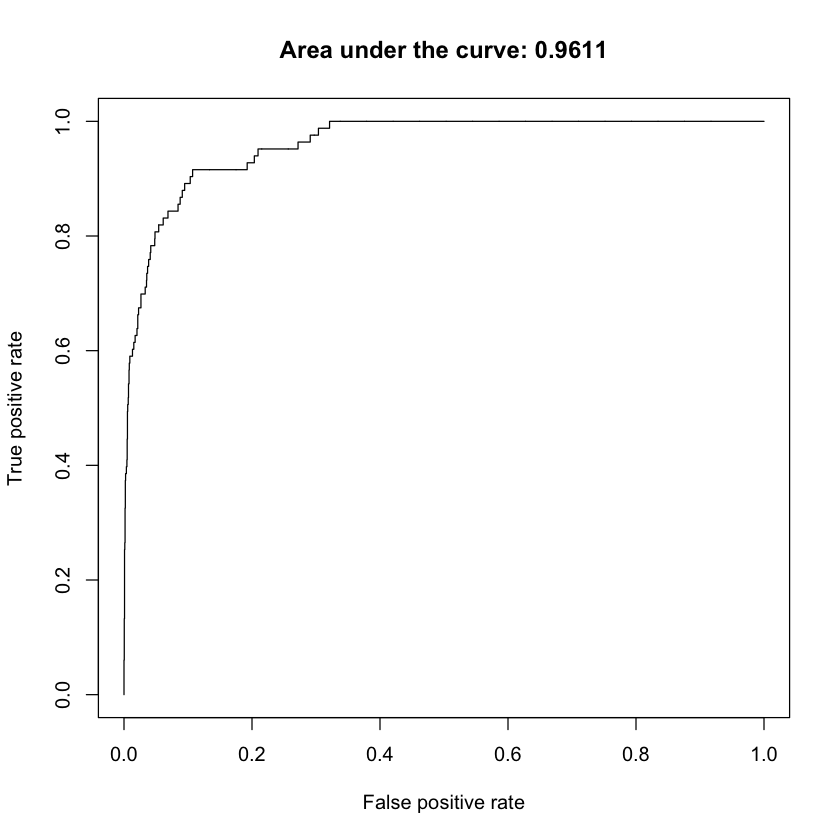

In [7]:
library(ROCR)

pred = predict(logit, test, type="response")

predObj = prediction(pred, test$default)

rocObj = performance(predObj, measure="tpr", x.measure="fpr")
aucObj = performance(predObj, measure="auc")

plot(rocObj, main = paste("Area under the curve:", round(aucObj@y.values[[1]] ,4)))

The usefulness of this plot is that the preferred outcome of a classifier is to have a low FPR and a high TPR. So, when moving from left to right on the FPR axis, a good model/ classifier has the TPR rapidly approach values near 1, with only a small change in FPR. The closer the ROC curve tracks along the vertical axis and approaches the upper-left hand of the plot, near the point (0,1), the better the model/classifier performs. Thus, a useful metric is to compute the area under the ROC curve (AUC). By examining the axes, it can be seen that the theoretical maximum for the area is 1.

## 6.5 More Classification Methods

### 6.5.1 Decision Trees

A decision tree (also called prediction tree) uses a tree structure to specify sequences of decisions and consequences. Given input X={x1,x2,...xn},the goal is to predict a response or output variable Y. The prediction can be achieved by constructing a decision tree with test points and branches. At each test point, a decision is made to pick a specific branch and traverse down the tree. Eventually, a final point is reached, and a prediction can be made. Each test point in a decision tree involves testing a particular input variable (or attribute), and each branch represents the decision being made. Due to its flexibility and easy visualization, decision trees are commonly deployed in data mining applications for classification purposes.

A depiction of a simple decision tree with three attributes (`gender`, `income` and `age`) is shown below. The top node is referred to as the root, while each subsequent split is called a branch. The depth of the tree is the length of the longest path in terms of traversed nodes, and the final nodes, in which each datapoint is assigned a class, are referred to as leaf nodes.

<img src="img/decision_tree.png" width=600>

The goal of any decision tree algorithm is to build the tree from its base, or initial junction. The first task is to determine which attribute is the most informative. To do this we select a feature and subset the training data according to the values of that feature. We can then use a heuristic to measure the information *purity*, before and after the split.

Popular decision tree algorithms include the ID3 and C4.5 algorithms (which use *entropy* to determine the most informative variable) and the CART algorithm (which uses the *Gini coefficient*).

### 6.5.2 Entropy and Information Gain

A common heuristic that measures the *impurity* of an attribute is the entropy of a sample. Entropy is a concept borrowed from thermodynamics in physics, which measures the *disorder* of an ensemble. This is analogous to the amount of knowledge we have about an object randomly selected from that system.

A simple way to understand this is to imagine a cup of boiling water vs. a cube of ice. In the high entropy system (the boiling water), molecules have a high mean velocity and are rotating, bending, and colliding (see [brownian motion](https://en.wikipedia.org/wiki/Brownian_motion)). If we choose a random water molecule, we have little knowledge of its instantaneous speed, position and atomic configuration (also known as its *state*). Contrast this with a low-entropy system, like the ice cube, which is composed of water molecules arranged in a crystal lattice, with very little movement and no collisions. If we randomly select a molecule from the ensemble, we have a lot more certainty about its *state*. We can use the concept of information entropy to measure the uncertainty in our class assignments given knowledge about some attribute.

For a given class $X$ and its label $x$, where $P(x)$ is the probability of x, we can write the entropy $H_x$

$$H_X = -\sum_{\forall x} P(x) \log_2(P(x))$$

$H_X$ is zero when all $P(x)$ are 0 or 1.

The next step is to identify the conditional entropy for each attribute. Given an attribute X, its value x, an outcome Y, and its value y

$$H_{Y|X}=\sum_x P(x)\sum_y P(y|x) \log_2(P(y|x))$$

Finally, we can define the entropy gain as the difference between the base entropy and the conditional entropy of the attribute:

$$InformationGain_X = H_Y - H_{X|Y}$$

To build the decision tree, we calculate the conditional entropy of each attribute, and select the feature with the highest associated information gain as the next node. At each node the training set is split according to the values of that attribute, and the calculation is repeated. This process is called recursive partitioning.

### 6.5.3 Gini Index

The Gini coefficient measures the inequality among values of a frequency distribution (for example, levels of income). A Gini coefficient of zero expresses perfect equality, where all values are the same (for example, where everyone has the same income). A Gini coefficient of 1 (or 0.5 depending on the formulation) expresses maximal inequality among values (e.g., for a large number of people, where only one person has all the income or consumption, and all others have none, the Gini coefficient will be very nearly one).

We can thus use the difference in Gini Index before and after a split to determine how much the split purifies our sample of classes, and thus determine the most important explanatory variable.

### 6.5.2 Continuous Variables

So far we have only talked about splitting categorical variables by their values, but this becomes slightly more complicated in the case of continuous variables, as the data needs to be split into ranges of values. One method of achieving this is to *brute force* various splits to find the highest information gain. To *brute force* is another way of saying to iterate over every possible option. One way of making this more efficient is to sort the values in a feature and test only the midpoints between each unique value as a split. For instance, if the values of our candidate feature are $[10,20,20,40,50]$ The candidate splits will be $[15,30,45]$.

### 6.5.3 Optimising Decision Trees

Decision trees use greedy algorithms, in that they always choose the option that seems the best available at that moment. At each step, the algorithm selects which attribute to use for splitting the remaining records. This selection may not be the best overall, but it is guaranteed to be the best at that step. This characteristic reinforces the efficiency of decision trees. However, once a bad split is taken, it is propagated through the rest of the tree. To address this problem, an ensemble technique (such as random forest) may randomize the splitting or even randomize data and come up with a multiple tree structure. These trees then vote for each class, and the class with the most votes is chosen as the predicted class.

In addition, having a model that is too complex may lead to overfitting. In overfitting, the model fits the training set almost perfectly, but it performs poorly on the new samples in the testing set. Rather than identifying the *underlying trend* in the data, the model learns the noise in our sample, and that noise will contribute to our prediction.

For decision tree learning, overfitting can be caused by either a lack of training data or the biased data in the training set. Two approaches can help avoid overfitting in decision tree learning.

   ● Limit the depth of the tree, or stop growing the tree early before it reaches the point where all the training data is perfectly classified.
   
   ● Limit the *minimum split* parameter, or the number of points that must be available in a training set for a split to be attempted.
   
   ● Grow the full tree, and then post-prune the tree with methods such as reduced-error pruning and rule-based post pruning.
    
### 6.5.4 Decision Trees in R

To build a decision tree using the default dataset, we can use the R `rpart` library, which stands for *recursive partitioning*. We can install it using `install.packages('rpart')` and then load it using `library(rpart)`.

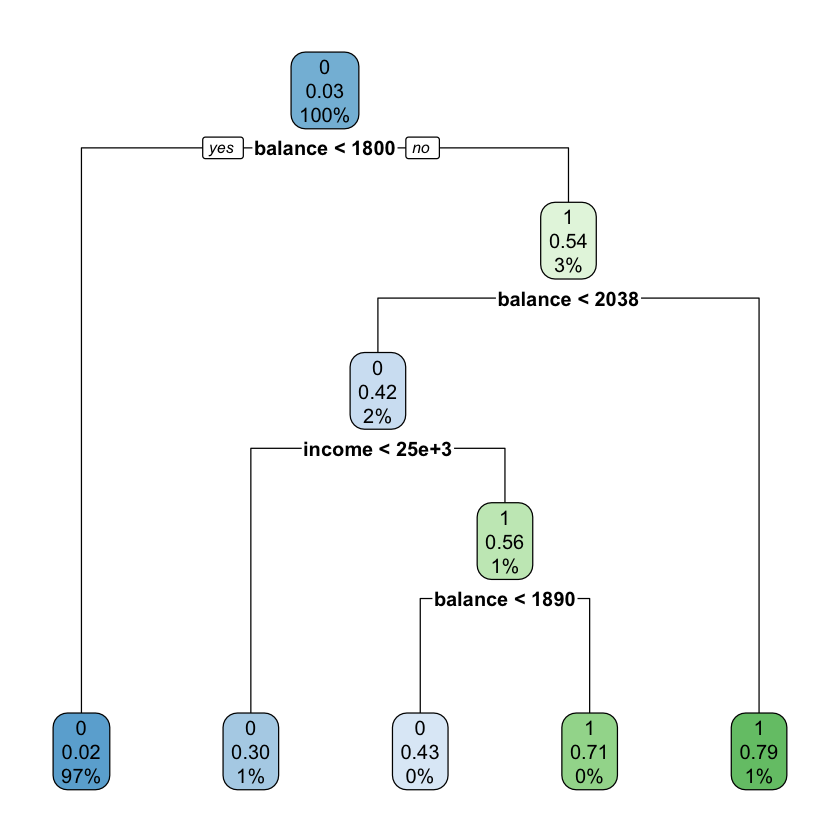

In [8]:
library(rpart)
library(rpart.plot)

dtree = rpart(default ~ ., method='class', data=train)

rpart.plot(dtree)

### 6.5.5 Naïve Bayes

Naïve Bayes is a probabilistic classification method based on Bayes’ theorem (or Bayes’ law) with a few tweaks. Bayes’ theorem gives the relationship between the probabilities of two events and their conditional probabilities, and provides a rigorous framework for updating states of knowledge and incorporating *prior* probabilities as well as weak syllogisms. Bayes’ law is named after the English mathematician Thomas Bayes, and there is evidence to show that biological brains use a process similar to Bayes' law to update information in memory.

The Naïve Bayes method is naïve in that it makes the assumption that all features in our model are *independent* or *orthogonal*, meaning that the value of one feature does not have any bearing on the value of another. This allows us to write an explicit expression for the probability of obtaining a certain outcome given a set of attributes and a training set. For this reason, there is no real training phase in Naïve Bayes, as we are not trying to estimate an ideal set of parameters. Naïve Bayes classifiers are *non-parametric*.

Deriving Bayes' theorem is surprisingly straightforward. The conditional probability of a class C given an attribute A can be written as:

$$P(C|A)=\frac{P(C∩A)}{P(A)}$$

And similarly:

$$\frac{P(C∩A)}{P(C)} = P(A|C) $$

Combining both expressions:

$$P(C|A) = \frac{P(A|C)P(C)}{P(A)}$$

$P(C|A)$ is called the *posterior* probability, $P(A|C)$ is called the *prior*, and $P(A)=\sum_iP(a_i|C)$ is a *normalisation factor*, where $a_i$ represents all possible outcomes for the observation A. When comparing the likelihood of two conditional events, the normalisation factor can be ignored. A more general form of the theorem is as follows:

$$P ( c_i | A ) = \frac{P ( a_1 , a_2 , ... , a_m | c_i ) \times P ( c_i )}{P(a_1,a_2,...,a_m)}$$

Making the assumption of orthogonality, we can rewrite 

$$P(a_1,a_2,...,a_m|c_i)=P(a_1|c_i)P(a_2|c_i)⋅⋅⋅P(a_m|c_i)=∏^m_{j=1}P(a_j|c_i)$$

Since we are only interested in comparative probabilities, we ignore the normalisation term in the demoninator, and the expression for the conditional probability of a class label is:

$$P(c_i|A)∝P(c_i)⋅∏^m_{j=1}P(a_j|c_i)$$

The Naïve Bayes classifier calculates the comparative probabilities for each class, and predicts the class with the highest probability. To do this, each attribute is assumed to be drawn from a particularl probability distribution, usually a Gaussian or Normal distribution with the same mean and standard deviation as the feature variable. This method is referred to as Gaussian Naïve Bayes.

### 6.5.6 Naïve Bayes in R

To implement a Naïve Bayes classifier in R, we can use the `e1071` package. It can be installed using `install.packages('e1071')`.

In [9]:
install.packages('e1071')
library(e1071)

nb <- naiveBayes(default ~ .,train)

nb


The downloaded binary packages are in
	/var/folders/gx/6rj0lcwx4r31949c1c9n1ttw0000gq/T//RtmpVC8azD/downloaded_packages



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1 
0.96667111 0.03332889 

Conditional probabilities:
   student
Y          No       Yes
  0 0.7043166 0.2956834
  1 0.6120000 0.3880000

   balance
Y       [,1]     [,2]
  0  811.919 457.8297
  1 1743.228 352.3089

   income
Y       [,1]     [,2]
  0 33468.78 13372.68
  1 31943.13 13757.37


The output gives the apriori probabilities for each class. That's just the raw proportion of our datapoints in each class, or the probability of selecting a class if you draw a random row from our dataset. The conditional probabilities measure the probability of obtaining a certain attribute value given the class, using the (naive) assumption that all features are independent/orthogonal.